In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns
import warnings
from tools import *

%matplotlib inline

warnings.filterwarnings('ignore')

## Distribution of P(active) values for each position

In [2]:
total_compounds = pd.read_csv('../../data_preparation/output/total_compounds.csv')
display(total_compounds.head(5))

,structure,read_count,bb1,bb2,bb3,bb1_iso,bb2_iso,bb3_iso
0,CN(Cc1c(F)ccc(Cl)c1F)C(=O)CCn1ccc(C(=O)NCCC(c2...,172,NCC1=C(F)C(Cl)=CC=C1F,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(c(c(c1F)CN)F)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
1,CN(Cc1cc(-c2ccc(Cl)cc2)no1)C(=O)CCn1ccc(C(=O)N...,162,NCC1=CC(C2=CC=C(Cl)C=C2)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(ccc1c2cc(on2)CN)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
2,CC(C)c1nc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc3...,149,CC(C)C1=NC(CN)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)c1nc(no1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
3,CN(Cc1cccc(C(F)(F)F)c1)C(=O)CCn1ccc(C(=O)NCCC(...,326,NCC1=CC(C(F)(F)F)=CC=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(cc(c1)C(F)(F)F)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
4,CC(C)Cc1cc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc...,329,CC(C)CC1=NOC(CN)=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)Cc1cc(on1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2


In [3]:
bb1_list = pd.read_csv('../../data_preparation/output/bb1_list.csv')
bb2_list = pd.read_csv('../../data_preparation/output/bb2_list.csv')
bb3_list = pd.read_csv('../../data_preparation/output/bb3_list.csv')

In [4]:
bb1_pactive = calc_pactive(total_compounds, bb1_list, 'bb1')
bb2_pactive = calc_pactive(total_compounds, bb2_list, 'bb2')
bb3_pactive = calc_pactive(total_compounds, bb3_list, 'bb3')

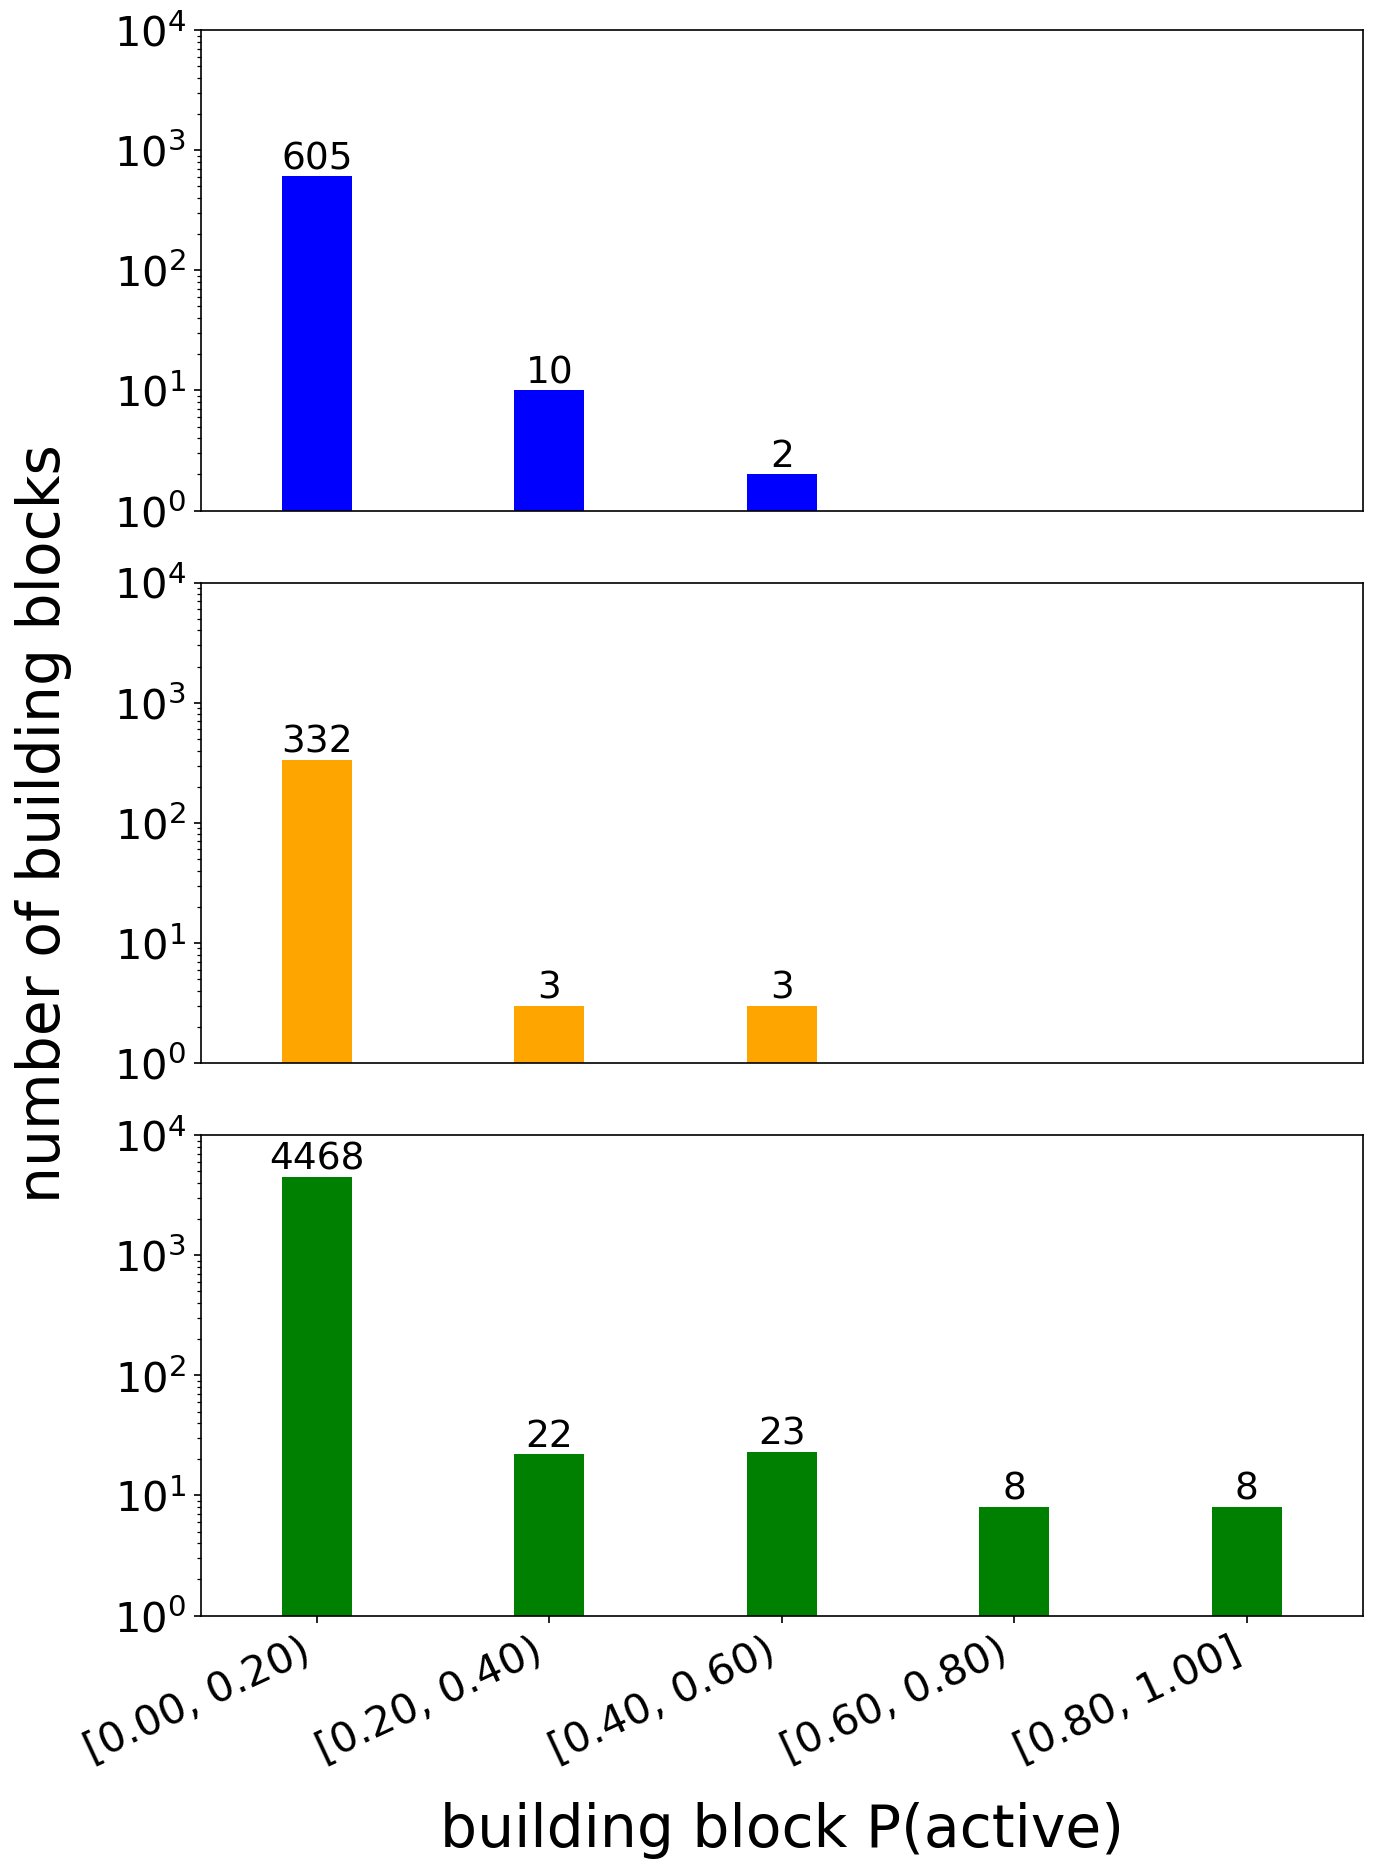

In [5]:
all_bins = np.arange(0, 1.2, 0.2)

a, a_ticks, a_labels = set_bins(bb1_pactive['P(active)'], bb_bins=all_bins)
b, b_ticks, b_labels = set_bins(bb2_pactive['P(active)'], bb_bins=all_bins)
c, c_ticks, c_labels = set_bins(bb3_pactive['P(active)'], bb_bins=all_bins)

# Plot spread of P(active) values for building blocks in position 1
fig, axs = plt.subplots(3, 1, figsize=(10,14), dpi=150, sharey=True)
plt.subplots_adjust(hspace=0.15)
a_bars = axs[0].bar(a_ticks, height=a[0], width=0.06, log=True, color='blue')
axs[0].bar_label(a_bars, fontsize=18, padding=0)
axs[0].set_xticks([])
axs[0].set_yticks(np.array([1, 10, 100, 1000, 10000]))
axs[0].set_yticklabels(np.array([1, 10, 100, 1000, 10000]), fontsize=20)
axs[0].set_xlim([0, 1])

# Plot spread of P(active) values for building blocks in position 2
b_bars = axs[1].bar(b_ticks, height=b[0], width=0.06, log=True, color='orange')
axs[1].bar_label(b_bars, fontsize=18, padding=0)
axs[1].set_xticks([])
axs[1].set_yticks(np.array([1, 10, 100, 1000, 10000]))
axs[1].set_yticklabels(np.array([1, 10, 100, 1000, 10000]), fontsize=20)
axs[1].set_xlim([0, 1])
axs[1].set_ylabel('number of building blocks', fontsize=28, labelpad=20)

# Plot spread of P(active) values for building blocks in position 3
c_bars = axs[2].bar(c_ticks, height=c[0], width=0.06, log=True, color='green')
axs[2].bar_label(c_bars, fontsize=18, padding=0)
axs[2].set_xticks(c_ticks)
axs[2].set_xticklabels(c_labels, rotation=25, ha='right', fontsize=20)
axs[2].set_yticks(np.array([1, 10, 100, 1000, 10000]))
axs[2].set_yticklabels(labels=['$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$'], fontsize=20)
axs[2].set_xlim([0, 1])
axs[2].set_ylim([1, 10000])
axs[2].set_xlabel('building block P(active)', fontsize=28, labelpad=15)

fig.savefig('figure_2.png')
plt.show()

In [6]:
total_merged = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
total_actives = get_actives(total_merged)

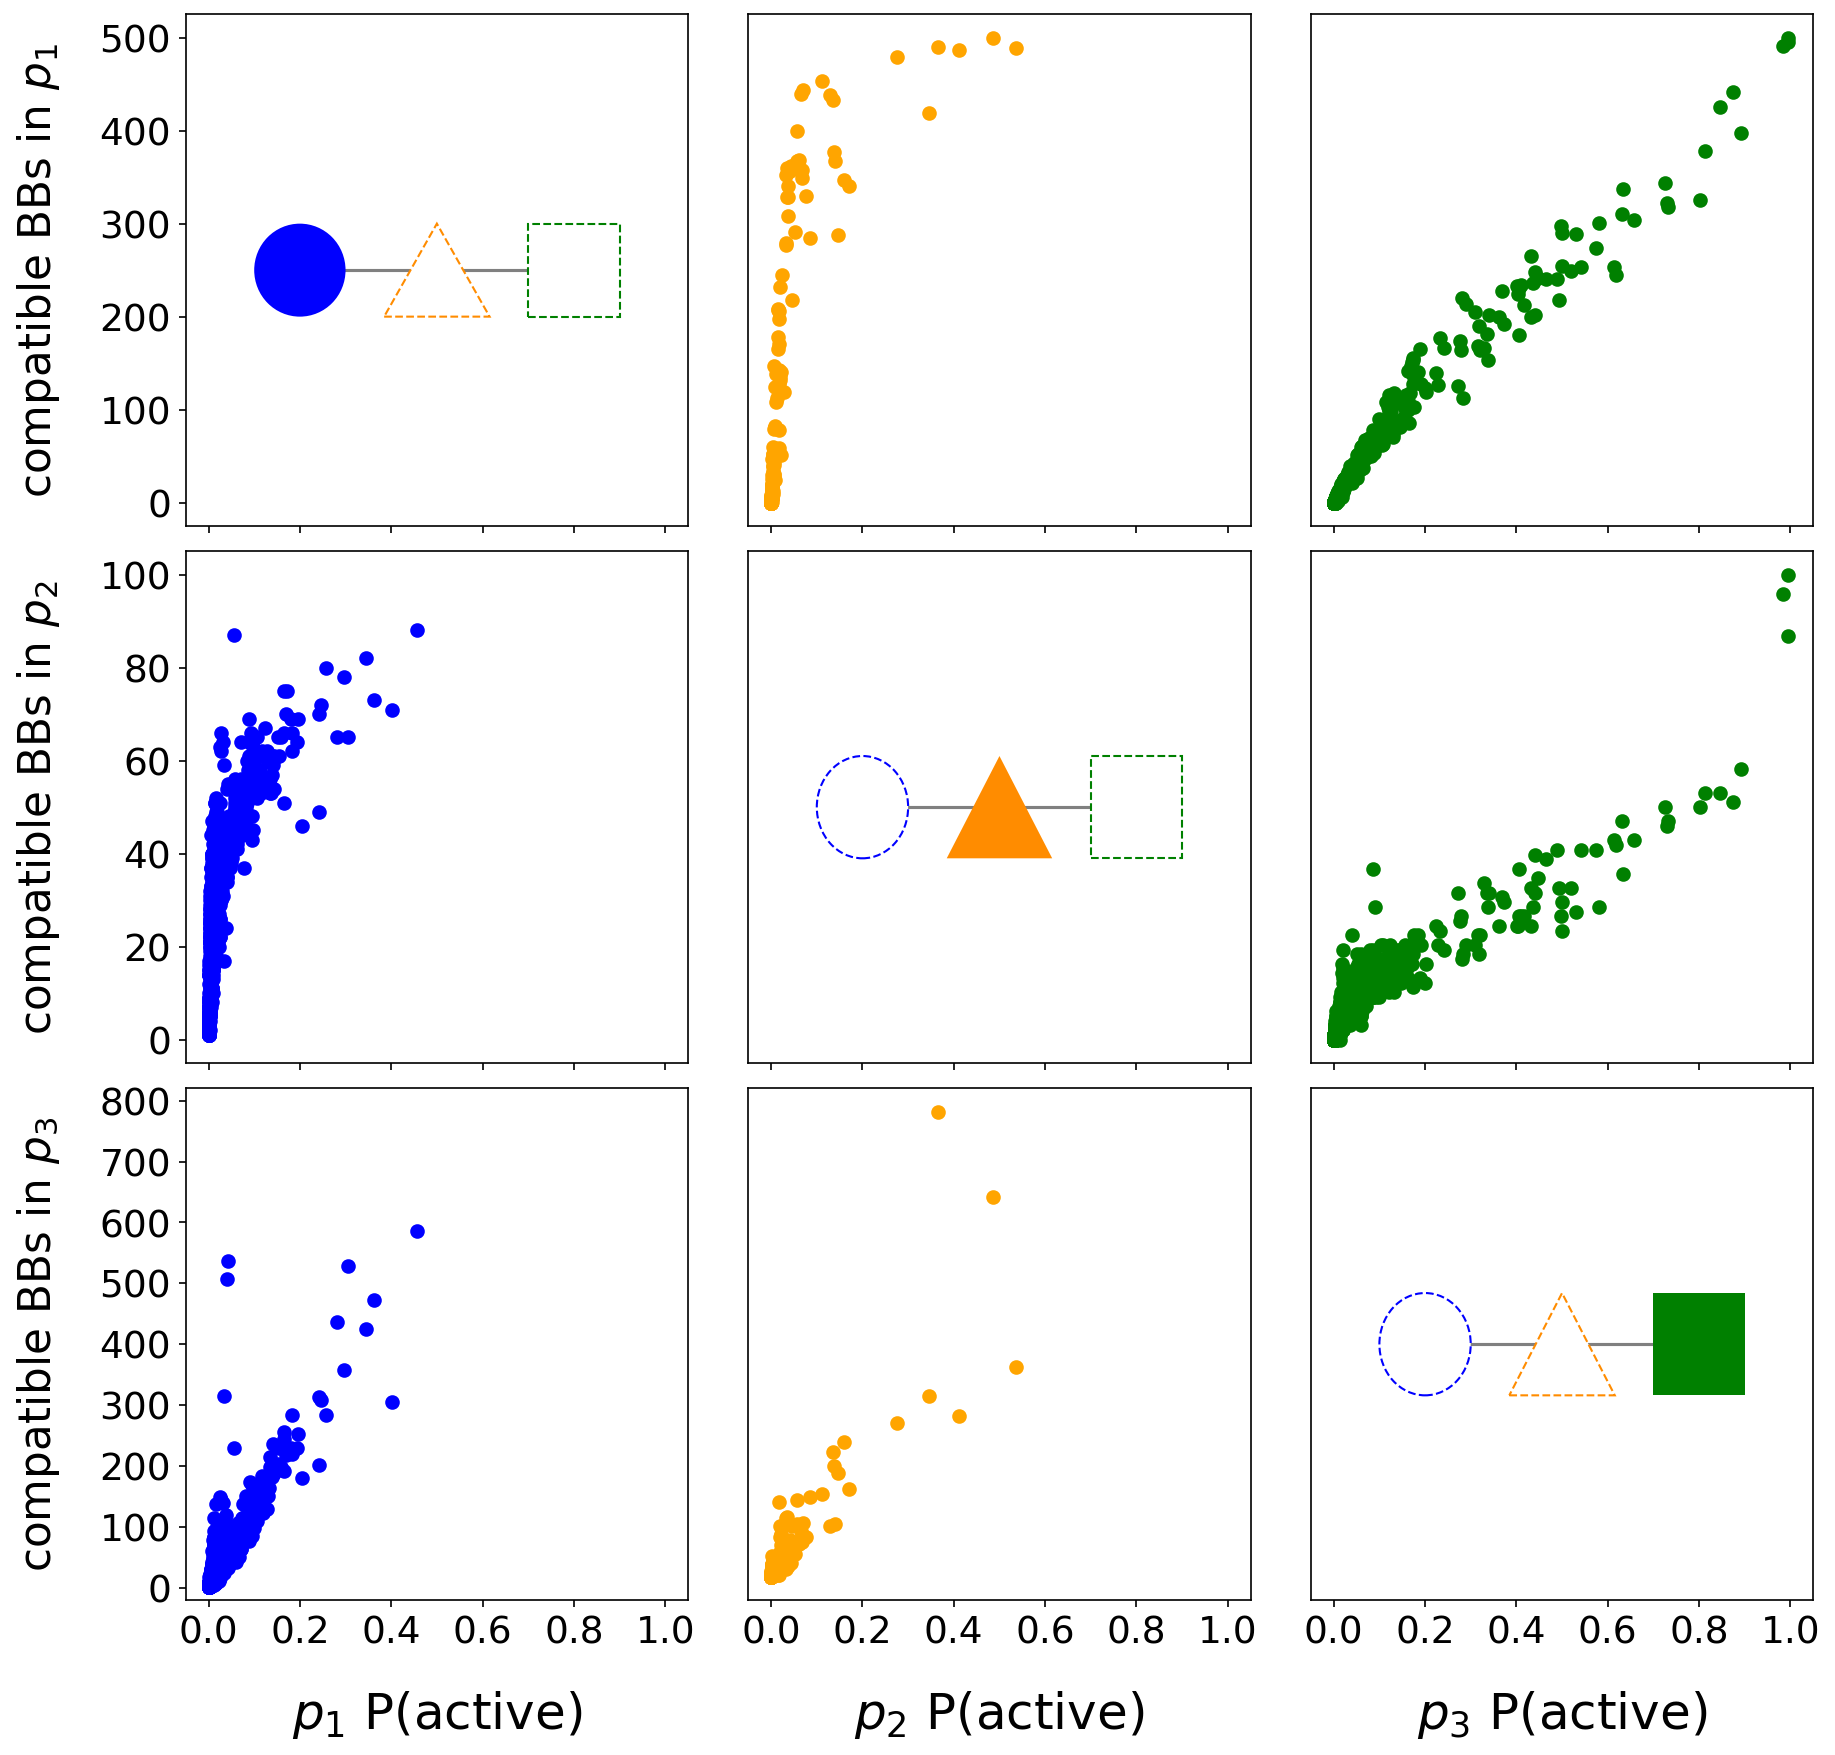

In [7]:
# Calculate number of compatible building blocks in positions 2 and 3 for each building block in position 1
D_12 = total_actives.groupby(['bb1', 'P(active)_1'], as_index=False)['bb2'].nunique()
D_13 = total_actives.groupby(['bb1', 'P(active)_1'], as_index=False)['bb3'].nunique()

# Calculate number of compatible building blocks in positions 1 and 3 for each building block in position 2
D_21 = total_actives.groupby(['bb2', 'P(active)_2'], as_index=False)['bb1'].nunique()
D_23 = total_actives.groupby(['bb2', 'P(active)_2'], as_index=False)['bb3'].nunique()


# Calculate number of compatible building blocks in positions 1 and 2 for each building block in position 3
D_31 = total_actives.groupby(['bb3', 'P(active)_3'], as_index=False)['bb1'].nunique()
D_32 = total_actives.groupby(['bb3', 'P(active)_3'], as_index=False)['bb2'].nunique()

fig, axs = plt.subplots(3, 3, figsize=(14, 14), dpi=150, sharex=True)
plt.subplots_adjust(wspace=0.12, hspace=0.05)

# Plot first row
axs[0][1].scatter(D_21['P(active)_2'], D_21['bb1'], color='orange')
axs[0][2].scatter(D_31['P(active)_3'], D_31['bb1'], color='green')
axs[0][0].set_xticks([])
axs[0][1].set_xticks([])
axs[0][2].set_xticks([])
p1_ticks = np.arange(0, 600, 100)
axs[0][0].set_ylim([-0.05, 1.05])
axs[0][0].set_ylabel('compatible BBs in $p_{1}$', fontsize=21, labelpad=18)
axs[0][0].set_yticks(np.arange(0, 1.2, 0.2))
axs[0][0].set_yticklabels(labels=p1_ticks, fontsize=18)
axs[0][1].set_yticks([])
axs[0][2].set_yticks([])

# Plot second row
axs[1][0].scatter(D_12['P(active)_1'], D_12['bb2'], color='blue')
axs[1][2].scatter(D_32['P(active)_3'], D_32['bb2'], color='green')
axs[1][0].set_xticks([])
axs[1][1].set_xticks([])
axs[1][2].set_xticks([])
p2_ticks = np.arange(0, 120, 20)
axs[1][0].set_ylim([-5, 105])
axs[1][0].set_ylabel('compatible BBs in $p_{2}$', fontsize=21, labelpad=18)
axs[1][0].set_yticks(p2_ticks)
axs[1][0].set_yticklabels(labels=p2_ticks, fontsize=18)
axs[1][1].set_yticks([])
axs[1][2].set_yticks([])

#Plot third row
axs[2][0].scatter(D_13['P(active)_1'], D_13['bb3'], color='blue')
axs[2][1].scatter(D_23['P(active)_2'], D_23['bb3'], color='orange')
x_ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[2][0].set_xticks(x_ticks)
axs[2][0].set_xticklabels(labels=x_ticks, fontsize=18)
axs[2][0].set_xlabel('$p_{1}$ P(active)', fontsize=24, labelpad=18)
axs[2][1].set_xticks(x_ticks)
axs[2][1].set_xticklabels(labels=x_ticks, fontsize=18)
axs[2][1].set_xlabel('$p_{2}$ P(active)', fontsize=24, labelpad=18)
axs[2][2].set_xticks(x_ticks)
axs[2][2].set_xticklabels(labels=x_ticks, fontsize=18)
axs[2][2].set_xlabel('$p_{3}$ P(active)', fontsize=24, labelpad=18)
p3_ticks = np.arange(0, 900, 100)
axs[2][0].set_xlim([-0.05, 1.05])
axs[2][0].set_ylim([-20, 820])
axs[2][0].set_ylabel('compatible BBs in $p_{3}$', fontsize=21, labelpad=18)
axs[2][0].set_yticks(p3_ticks)
axs[2][0].set_yticklabels(labels=p3_ticks, fontsize=18)
axs[2][1].set_yticks([])
axs[2][2].set_yticks([])

# Format graphics in the main diagonal of the subplots
line_1 = plt.Line2D((0.2, 0.8), (0.5, 0.5), lw=1.5, color='gray')
axs[0][0].add_line(line_1)

circle_1 = plt.Circle((0.2, 0.5), 0.1, fc='blue', ec='None', zorder=3)
axs[0][0].add_patch(circle_1)

pts_1 = np.array([[0.5-(0.2/np.sqrt(3)), 0.4], [0.5+(0.2/np.sqrt(3)), 0.4], [0.5, 0.6]])
tri_1 = Polygon(pts_1, closed=True, fc='white', ec='darkorange', linestyle='dashed', zorder=3)
axs[0][0].add_patch(tri_1)

rect_1 = plt.Rectangle((0.7,0.4), 0.2, 0.2, fc='white', ec='green', linestyle='dashed', zorder=3)
axs[0][0].add_patch(rect_1)

line_2 = plt.Line2D((0.2, 0.8), (0.5, 0.5), lw=1.5, color='gray')
axs[1][1].add_line(line_2)

circle_2 = plt.Circle((0.2, 0.5), 0.1, fc='white', ec='blue', linestyle='dashed', zorder=3)
axs[1][1].add_patch(circle_2)

pts_2 = np.array([[0.5-(0.2/np.sqrt(3)), 0.4], [0.5+(0.2/np.sqrt(3)), 0.4], [0.5, 0.6]])
tri_2 = Polygon(pts_2, closed=True, fc='darkorange', ec='None', zorder=3)
axs[1][1].add_patch(tri_2)

rect_2 = plt.Rectangle((0.7,0.4), 0.2, 0.2, fc='white', ec='green', linestyle='dashed', zorder=3)
axs[1][1].add_patch(rect_2)

line_3 = plt.Line2D((0.2, 0.8), (0.5, 0.5), lw=1.5, color='gray')
axs[2][2].add_line(line_3)

circle_3 = plt.Circle((0.2, 0.5), 0.1, fc='white', ec='blue', linestyle='dashed', zorder=3)
axs[2][2].add_patch(circle_3)

pts_3 = np.array([[0.5-(0.2/np.sqrt(3)), 0.4], [0.5+(0.2/np.sqrt(3)), 0.4], [0.5, 0.6]])
tri_3 = Polygon(pts_3, closed=True, fc='white', ec='darkorange', linestyle='dashed', zorder=3)
axs[2][2].add_patch(tri_3)

rect_3 = plt.Rectangle((0.7,0.4), 0.2, 0.2, fc='green', ec='None', zorder=3)
axs[2][2].add_patch(rect_3)

fig.savefig('figure_3.png')
plt.show()

### View 2D bins

In [8]:
bb1_pactive = apply_bins(bb1_pactive, bb_pos='bb1', all_bins=all_bins)
bb2_pactive = apply_bins(bb2_pactive, bb_pos='bb2', all_bins=all_bins)
bb3_pactive = apply_bins(bb3_pactive, bb_pos='bb3', all_bins=all_bins)

In [9]:
total_bins = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)

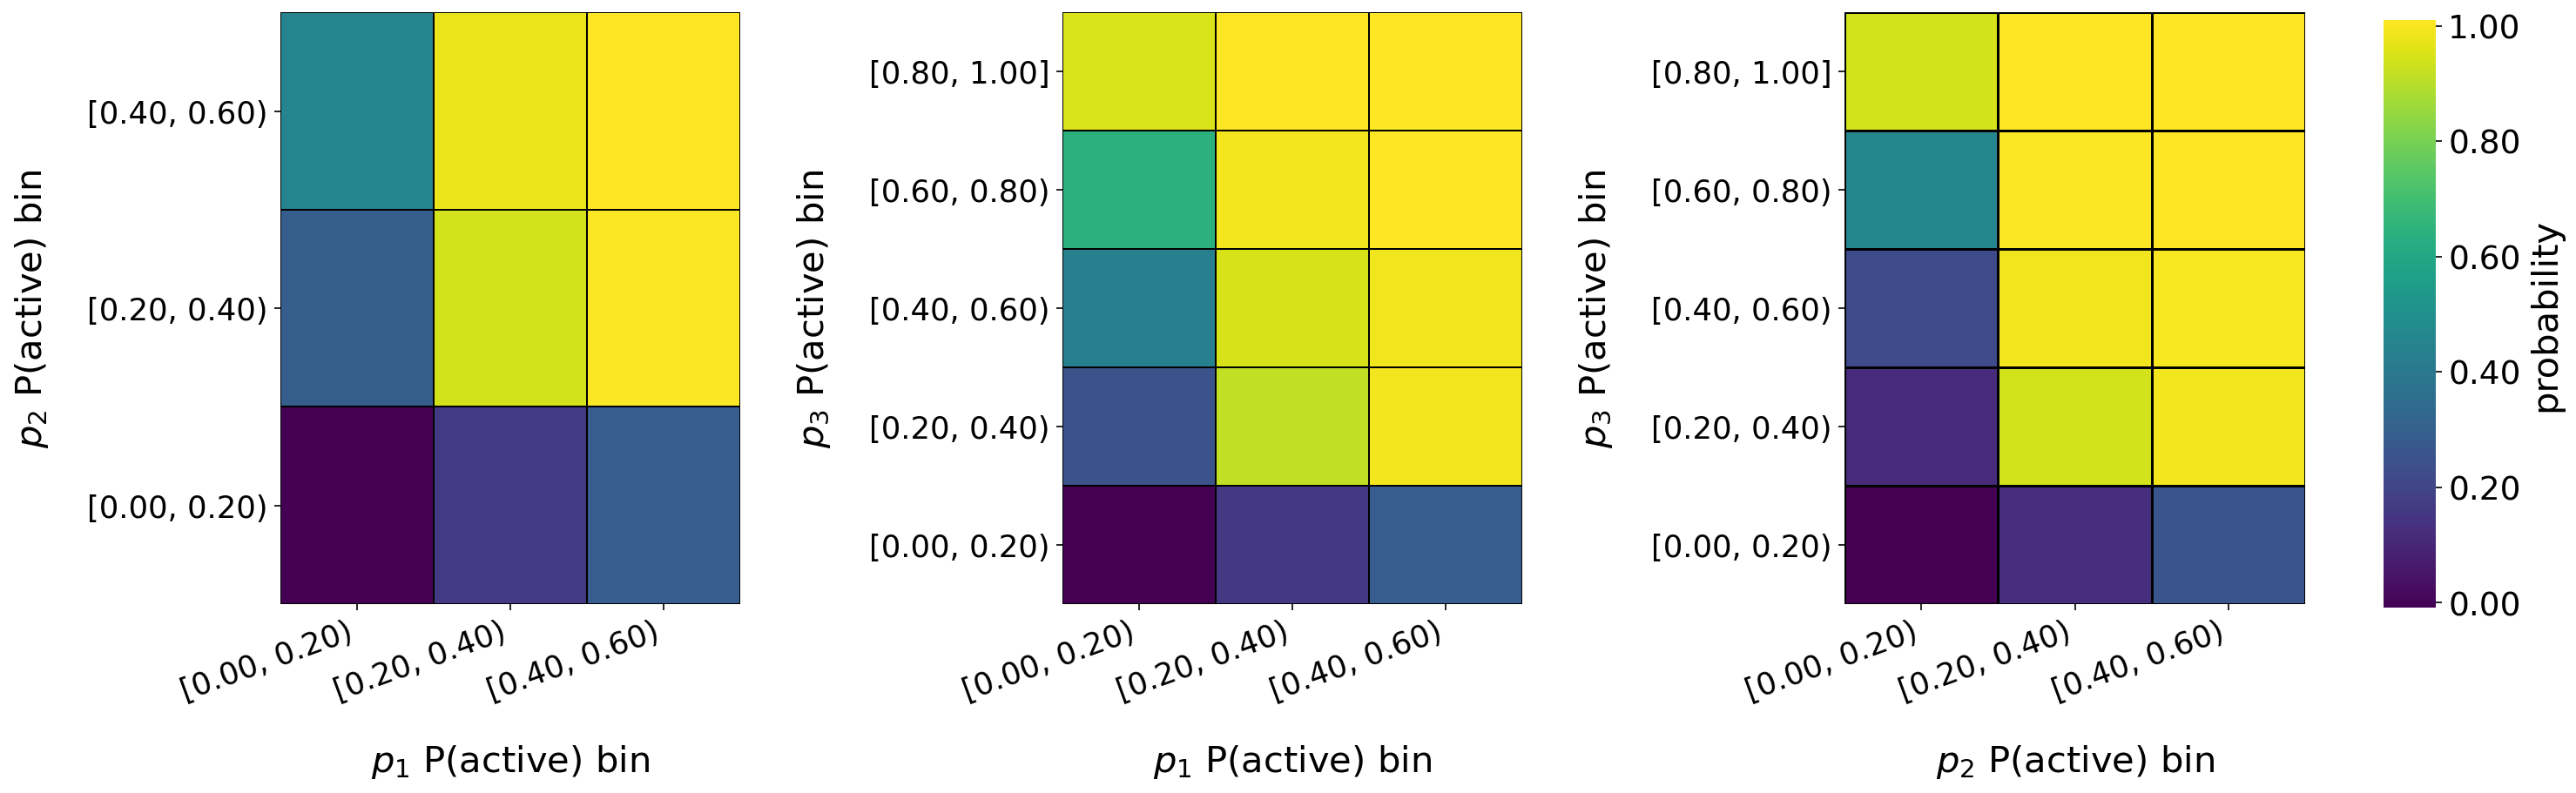

In [13]:
n_bins = len(all_bins)-1
# Calculate probability of forming active compound for combinations of P(active) bins in positions 1 and 2
ab = total_bins.groupby(['bb1_bins', 'bb2_bins'], as_index=False)['active'].mean()
val_1_2 = np.zeros((n_bins,n_bins))
for ind_1, ind_2, active_rate in zip(ab['bb1_bins'], ab['bb2_bins'], ab['active']):
    val_1_2[n_bins-1-ind_2, ind_1] = active_rate

# Calculate probability of forming active compound for combinations of P(active) bins in positions 2 and 3
bc = total_bins.groupby(['bb2_bins', 'bb3_bins'], as_index=False)['active'].mean()
val_2_3 = np.zeros((n_bins,n_bins))
for ind_2, ind_3, active_rate in zip(bc['bb2_bins'], bc['bb3_bins'], bc['active']):
    val_2_3[n_bins-1-ind_3, ind_2] = active_rate

# Calculate probability of forming active compound for combinations of P(active) bins in positions 1 and 3
ac = total_bins.groupby(['bb1_bins', 'bb3_bins'], as_index=False)['active'].mean()
val_1_3 = np.zeros((n_bins,n_bins))
for ind_1, ind_3, active_rate in zip(ac['bb1_bins'], ac['bb3_bins'], ac['active']):
    val_1_3[n_bins-1-ind_3, ind_1] = active_rate

fig, axs = plt.subplots(1, 3, figsize=(20,6), dpi=150)
plt.subplots_adjust(wspace=0.7)

axes_fs=17
labels_fs=18
axlabel_fs=20
labelpad=20
cbar_ax = fig.add_axes([0.93, 0.12, 0.02, 0.75])

# Create bin assignments, tick locations and tick labels
a, a_ticks, a_labels = set_bins(bb1_pactive['P(active)'], bb_bins=all_bins)
b, b_ticks, b_labels = set_bins(bb2_pactive['P(active)'], bb_bins=all_bins)
c, c_ticks, c_labels = set_bins(bb3_pactive['P(active)'], bb_bins=all_bins)

# Get all P(active) bins that have building blocks for each position
A = np.sum(np.where(a[0] != 0))
B = np.sum(np.where(b[0] != 0))
C = np.sum(np.where(c[0] != 0))

# Plot pairwise probability of forming active compound for building block P(active) in position 1 and 2
sns.heatmap(val_1_2[-B:, :A], cmap='viridis', annot=False, ax=axs[0], fmt='.2g',annot_kws={'fontsize': labels_fs},
            cbar_ax=cbar_ax, linewidth=0.01, linecolor='black')
axs[0].set_xticklabels(a_labels[:A], rotation=20, ha='right', fontsize=axes_fs)
axs[0].set_yticklabels(b_labels[B-1::-1], rotation=0, ha='right', fontsize=axes_fs)
axs[0].set_xlabel('$p_1$ P(active) bin', labelpad=labelpad, fontsize=axlabel_fs)
axs[0].set_ylabel('$p_2$ P(active) bin', labelpad=labelpad, fontsize=axlabel_fs)

# Plot pairwise probability of forming active compound for building block P(active) in position 1 and 3
sns.heatmap(val_1_3[:C, :A], cmap='viridis', annot=False, ax=axs[1], fmt='.2g',annot_kws={'fontsize': labels_fs}, 
            cbar_ax=cbar_ax, linewidth=0.01, linecolor='black')
axs[1].set_xticklabels(a_labels[:A], rotation=20, ha='right', fontsize=axes_fs)
axs[1].set_yticklabels(c_labels[C-1::-1], rotation=0, ha='right', fontsize=axes_fs)
axs[1].set_xlabel('$p_1$ P(active) bin', labelpad=labelpad, fontsize=axlabel_fs)
axs[1].set_ylabel('$p_3$ P(active) bin', labelpad=labelpad, fontsize=axlabel_fs)

# Plot pairwise probability of forming active compound for building block P(active) in position 2 and 3
sns.heatmap(val_2_3[:C, :B], cmap='viridis', annot=False, ax=axs[2], fmt='.2g',annot_kws={'fontsize': labels_fs},
            cbar_ax=cbar_ax, linewidth=0.5, linecolor='black')
axs[2].set_xticklabels(b_labels[:B], rotation=20, ha='right', fontsize=axes_fs)
axs[2].set_yticklabels(c_labels[C-1::-1], rotation=0, ha='right', fontsize=axes_fs)
axs[2].set_xlabel('$p_2$ P(active) bin', labelpad=labelpad, fontsize=axlabel_fs)
axs[2].set_ylabel('$p_3$ P(active) bin', labelpad=labelpad, fontsize=axlabel_fs)

cbar = axs[2].collections[0].colorbar
cbar.set_ticks(np.linspace(0.01, 0.99, 6))
labels = [f'{x:.2f}' for x in np.arange(0, 1.2, 0.2)]
cbar.set_ticklabels(labels)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('probability', fontsize=20)

fig.savefig('figure_4.png', bbox_inches="tight")
plt.show()

### Import similarity matrix

In [16]:
bb1_sim_3D = np.load('../../similarity_calculation/output/bb1_list.npy')
bb2_sim_3D = np.load('../../similarity_calculation/output/bb2_list.npy')
bb3_sim_3D = np.load('../../similarity_calculation/output/bb3_list.npy')

bb1_dist_3D = dist_mat(bb1_sim_3D)
bb2_dist_3D = dist_mat(bb2_sim_3D)
bb3_dist_3D = dist_mat(bb3_sim_3D)

#### Map coordinates with UMAP

In [17]:
trans_bb1 = umap_transform(bb1_dist_3D)
trans_bb2 = umap_transform(bb2_dist_3D)
trans_bb3 = umap_transform(bb3_dist_3D)

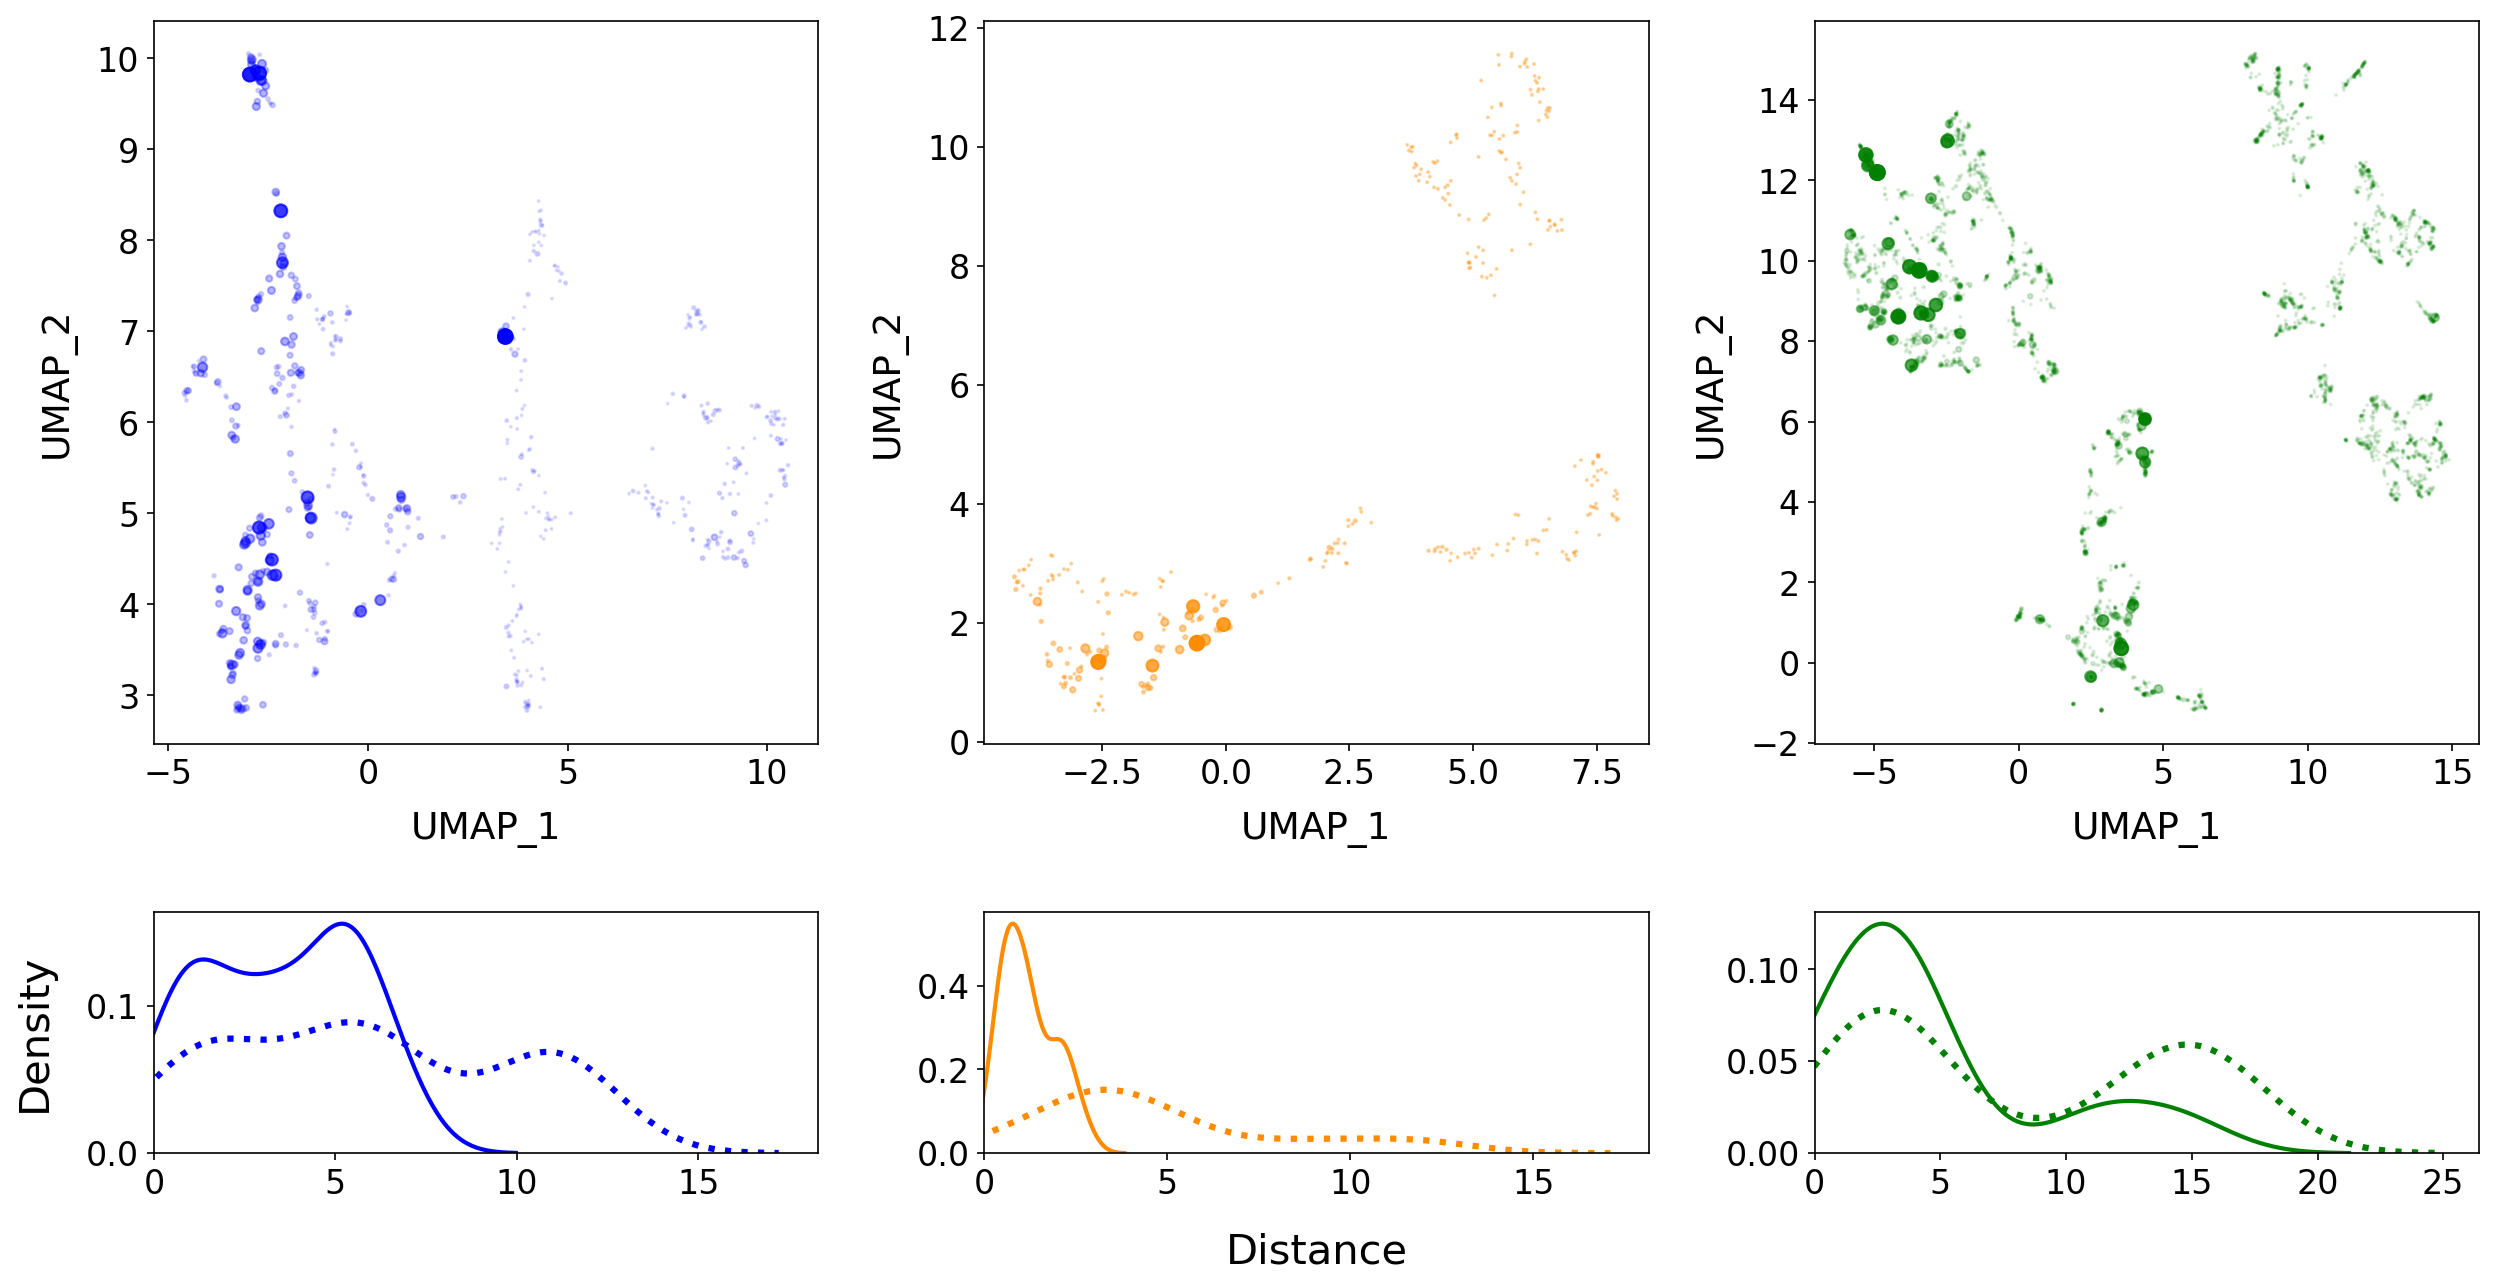

In [24]:
bb1_size = [normalize_range(0, np.max(bb1_pactive['P(active)']), 1, 50, x) for x in bb1_pactive['P(active)']]
bb2_size = [normalize_range(0, np.max(bb2_pactive['P(active)']), 1, 50, x) for x in bb2_pactive['P(active)']]
bb3_size = [normalize_range(0, np.max(bb3_pactive['P(active)']), 1, 50, x) for x in bb3_pactive['P(active)']]

# Adjust marker transparency based on P(active) value
bb1_alpha = [normalize_range(0, np.max(bb1_pactive['P(active)']), 0.1, 1, x) for x in bb1_pactive['P(active)']]
bb2_alpha = [normalize_range(0, np.max(bb2_pactive['P(active)']), 0.3, 1, x) for x in bb2_pactive['P(active)']]
bb3_alpha = [normalize_range(0, np.max(bb3_pactive['P(active)']), 0.1, 1, x) for x in bb3_pactive['P(active)']]

bb1_colors = [[0.0, 0.0, 1, x] for x in bb1_alpha]
bb2_colors = [[1.0, 0.549, 0, x] for x in bb2_alpha]
bb3_colors = [[0.0, 0.50196, 0, x] for x in bb3_alpha]

fig, axs = plt.subplots(2, 3, dpi=150, figsize=(20,10), 
                        gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.25, hspace=0.35)

label_fs=18
tick_fs=16

# Assign X and Y coordinates for each point from UMAP
bb1_pactive[['X','Y']] = trans_bb1.embedding_
bb2_pactive[['X','Y']] = trans_bb2.embedding_
bb3_pactive[['X','Y']] = trans_bb3.embedding_

# Plot each building block in position 1 in UMAP space scaled by its P(active) value 
axs[0][0].scatter(bb1_pactive['X'], bb1_pactive['Y'], s=bb1_size, color=bb1_colors)
axs[0][0].set_xlabel('UMAP_1', fontsize=label_fs, labelpad=10)
axs[0][0].set_ylabel('UMAP_2', fontsize=label_fs, labelpad=10)
axs[0][0].tick_params(axis='both', labelsize=tick_fs)

# Plot each building block in position 2 in UMAP space scaled by its P(active) value 
axs[0][1].scatter(bb2_pactive['X'], bb2_pactive['Y'], s=bb2_size, color=bb2_colors)
axs[0][1].set_xlabel('UMAP_1', fontsize=label_fs, labelpad=10)
axs[0][1].set_ylabel('UMAP_2', fontsize=label_fs, labelpad=10)
axs[0][1].tick_params(axis='both', labelsize=tick_fs)

# Plot each building block in position 3 in UMAP space scaled by its P(active) value 
axs[0][2].scatter(bb3_pactive['X'], bb3_pactive['Y'], s=bb3_size, color=bb3_colors)
axs[0][2].set_xlabel('UMAP_1', fontsize=label_fs, labelpad=10)
axs[0][2].set_ylabel('UMAP_2', fontsize=label_fs, labelpad=10)
axs[0][2].tick_params(axis='both', labelsize=tick_fs)

# Calculate distances between points in UMAP space
bb1_dist_mat = distance_matrix(trans_bb1.embedding_, trans_bb1.embedding_)
bb2_dist_mat = distance_matrix(trans_bb2.embedding_, trans_bb2.embedding_)
bb3_dist_mat = distance_matrix(trans_bb3.embedding_, trans_bb3.embedding_)

# Get distance between top P(active) and randomly selected building blocks in position 1
top_ind = bb1_pactive.sort_values(by='P(active)', ascending=False).head(10).index
rand_ind = bb1_pactive.sample(n=10, random_state=42).index
bb1_top = bb1_dist_mat[top_ind, :][:, top_ind]
bb1_rand = bb1_dist_mat[rand_ind, :][:, rand_ind]
bb1_top_rand = bb1_dist_mat[top_ind, :][:, rand_ind]

# Get distance between top P(active) and randomly selected building blocks in position 2
top_ind = bb2_pactive.sort_values(by='P(active)', ascending=False).head(10).index
rand_ind = bb2_pactive.sample(n=10, random_state=42).index
bb2_top = bb2_dist_mat[top_ind, :][:, top_ind]
bb2_rand = bb2_dist_mat[rand_ind, :][:, rand_ind]
bb2_top_rand = bb2_dist_mat[top_ind, :][:, rand_ind]

# Get distance between top P(active) and randomly selected building blocks in position 3
top_ind = bb3_pactive.sort_values(by='P(active)', ascending=False).head(10).index
rand_ind = bb3_pactive.sample(n=10, random_state=42).index
bb3_top = bb3_dist_mat[top_ind, :][:, top_ind]
bb3_rand = bb3_dist_mat[rand_ind, :][:, rand_ind]
bb3_top_rand = bb3_dist_mat[top_ind, :][:, rand_ind]

# Plot density of distances between top P(active) building blocks and randomly selected building blocks in position 1
sns.kdeplot(bb1_top[np.triu_indices(10, k=1)], color='blue', ax=axs[1][0], linewidth=2)
sns.kdeplot(bb1_top_rand.ravel(), color='blue', linestyle='dotted', ax=axs[1][0], linewidth=3)
axs[1][0].set_xlim(left=0)
axs[1][0].tick_params(axis='both', which='major', labelsize=tick_fs)
axs[1][0].set_ylabel('Density', labelpad=15, fontsize=20)

# Plot density of distances between top P(active) building blocks and randomly selected building blocks in position 2
sns.kdeplot(bb2_top[np.triu_indices(10, k=1)], color='darkorange', ax=axs[1][1], linewidth=2)
sns.kdeplot(bb2_top_rand.ravel(), color='darkorange', linestyle='dotted', ax=axs[1][1], linewidth=3)
axs[1][1].set_xlim(left=0)
axs[1][1].set_ylabel('')
axs[1][1].tick_params(axis='both', which='major', labelsize=tick_fs)
axs[1][1].set_xlabel('Distance', labelpad=15, fontsize=20)

# Plot density of distances between top P(active) building blocks and randomly selected building blocks in position 3
sns.kdeplot(bb3_top[np.triu_indices(10, k=1)], color='green', ax=axs[1][2], linewidth=2)
sns.kdeplot(bb3_top_rand.ravel(), color='green', linestyle='dotted', ax=axs[1][2], linewidth=3)
axs[1][2].set_xlim(left=0)
axs[1][2].set_ylabel('')
axs[1][2].tick_params(axis='both', which='major', labelsize=tick_fs)

fig.savefig('figure_6.png', bbox_inches='tight')
plt.show()

### Cluster with HDBSCAN

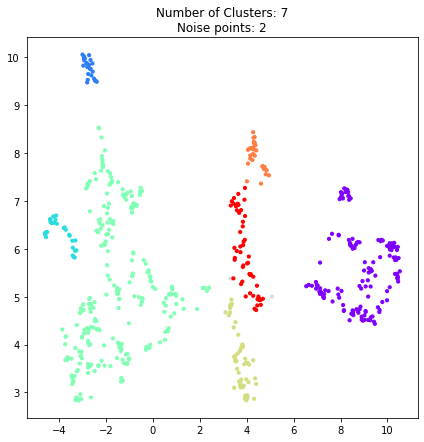

In [14]:
bb1_params = hdbscan_param_search(bb1_pactive, trans_bb1)
bb1_best_params = optimal_params(bb1_params)
bb1_pactive = plot_hdbscan(bb1_pactive, bb1_best_params, trans_bb1)

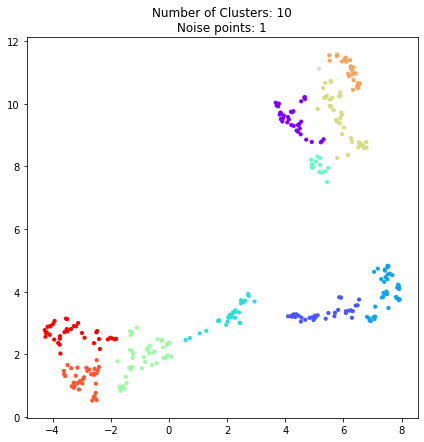

In [15]:
bb2_params = hdbscan_param_search(bb2_pactive, trans_bb2)
bb2_best_params = optimal_params(bb2_params)
bb2_pactive = plot_hdbscan(bb2_pactive, bb2_best_params, trans_bb2)

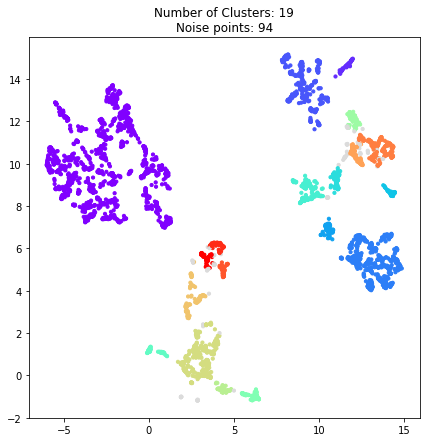

In [16]:
bb3_params = hdbscan_param_search(bb3_pactive, trans_bb3)
bb3_best_params = optimal_params(bb3_params)
bb3_pactive = plot_hdbscan(bb3_pactive, bb3_best_params, trans_bb3)

#### View interactive plots with compound structures (mouse-over point)

In [17]:
#plot_hdbscan_interactive(bb1_pactive, bb1_best_params, trans_bb1, bb_pos='bb1')
#plot_hdbscan_interactive(bb2_pactive, bb2_best_params, trans_bb2, bb_pos='bb2')
#plot_hdbscan_interactive(bb3_pactive, bb3_best_params, trans_bb3, bb_pos='bb3')

### Aggregate by cluster

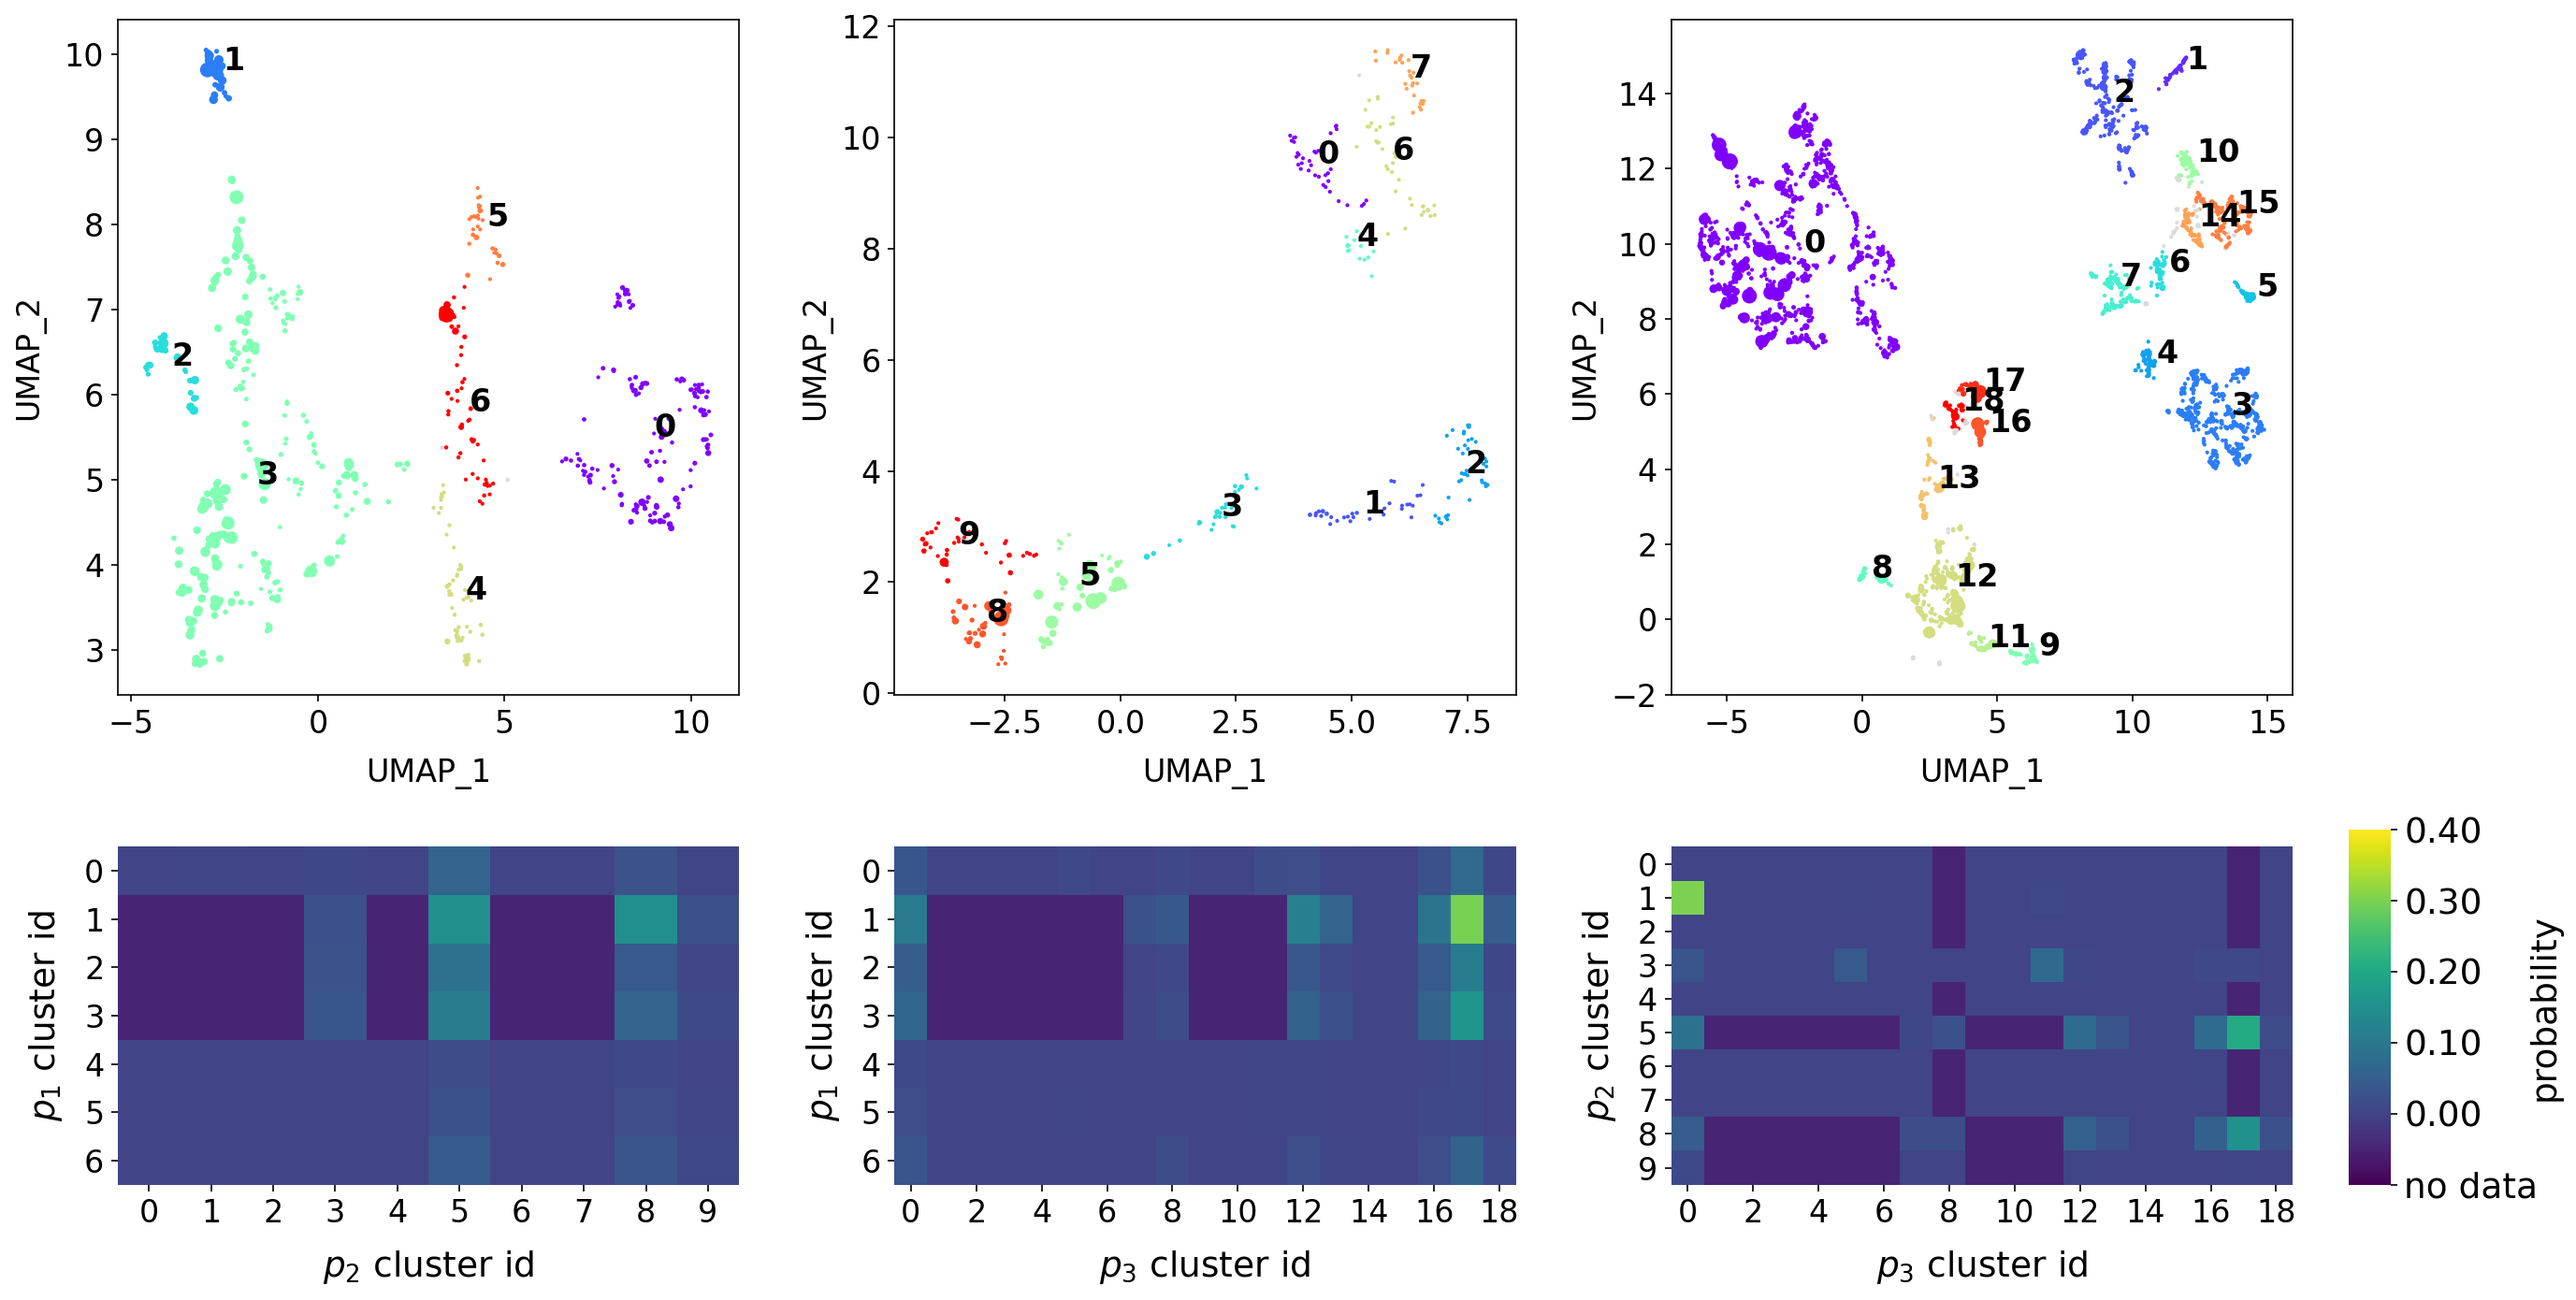

In [18]:
# Query building blocks that have cluster assignment for each position (not a noise point)
clustered_bb1 = bb1_pactive.loc[bb1_pactive['Cluster'] > -1]
clustered_bb1 = clustered_bb1.rename(columns={'Cluster': 'bb1_Cluster'})
clustered_bb2 = bb2_pactive.loc[bb2_pactive['Cluster'] > -1]
clustered_bb2 = clustered_bb2.rename(columns={'Cluster': 'bb2_Cluster'})
clustered_bb3 = bb3_pactive.loc[bb3_pactive['Cluster'] > -1]
clustered_bb3 = clustered_bb3.rename(columns={'Cluster': 'bb3_Cluster'})

# Identify all compounds where the building blocks at all three positions have a cluster assignment
total_merged = total_compounds.merge(clustered_bb1, on='bb1')\
    .rename(columns={'Cluster': 'bb1_Cluster', 'P(active)': 'P(active)_1'})\
    .merge(clustered_bb2, on='bb2')\
    .rename(columns={'Cluster': 'bb2_Cluster', 'P(active)': 'P(active)_2'})\
    .merge(clustered_bb3, on='bb3')\
    .rename(columns={'Cluster': 'bb3_Cluster', 'P(active)': 'P(active)_3'})

# Calculate pairwise probability of forming active compounds for building block clusters
ab = total_merged.groupby(['bb1_Cluster', 'bb2_Cluster'], as_index=False)['active'].mean()
bc = total_merged.groupby(['bb2_Cluster', 'bb3_Cluster'], as_index=False)['active'].mean()
ac = total_merged.groupby(['bb1_Cluster', 'bb3_Cluster'], as_index=False)['active'].mean()

n_bb1 = len(np.unique(bb1_pactive['Cluster']))-1
n_bb2 = len(np.unique(bb2_pactive['Cluster']))-1
n_bb3 = len(np.unique(bb3_pactive['Cluster']))-1

# Store values in matrix and identify combinations of clusters containing no data
ab_mat = np.ones((n_bb1, n_bb2))*-0.05
for b1, b2, val in zip(ab['bb1_Cluster'], ab['bb2_Cluster'], ab['active']):
    ab_mat[b1, b2] = val

ac_mat = np.ones((n_bb1, n_bb3))*-0.05
for b1, b3, val in zip(ac['bb1_Cluster'], ac['bb3_Cluster'], ac['active']):
    ac_mat[b1, b3] = val

bc_mat = np.ones((n_bb2, n_bb3))*-0.05
for b2, b3, val in zip(bc['bb2_Cluster'], bc['bb3_Cluster'], bc['active']):
    bc_mat[b2, b3] = val

# Scale marker size by the value of the building block P(active)
bb1_size = [normalize_range(0, np.max(bb1_pactive['P(active)']), 1, 50, x) for x in bb1_pactive['P(active)']]
bb2_size = [normalize_range(0, np.max(bb2_pactive['P(active)']), 1, 50, x) for x in bb2_pactive['P(active)']]
bb3_size = [normalize_range(0, np.max(bb3_pactive['P(active)']), 1, 50, x) for x in bb3_pactive['P(active)']]

# Color each point by its cluster assignment
bb1_colors = np.array(set_colors(bb1_pactive['Cluster']))
bb2_colors = np.array(set_colors(bb2_pactive['Cluster']))
bb3_colors = np.array(set_colors(bb3_pactive['Cluster']))

sns.reset_orig()
fig, axs = plt.subplots(2, 3, dpi=150, figsize=(20,11), 
                       gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(wspace=0.25, hspace=0.3)

label_fs=16
tick_fs=16

# Plot clustering in UMAP space for building blocks in position 1
for i in range(np.max(bb1_pactive['Cluster'])+1):
    sub = bb1_pactive[bb1_pactive['Cluster'] == i]
    xtext, ytext = np.median(sub['X']), np.median(sub['Y'])
    txt = axs[0][0].text(xtext+0.2, ytext, str(i), fontsize=16, weight='bold')

axs[0][0].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], s=bb1_size, color=bb1_colors[bb1_pactive['Cluster']])
axs[0][0].tick_params(axis="both", labelsize=tick_fs)
axs[0][0].set_xlabel('UMAP_1', fontsize=label_fs, labelpad=10)
axs[0][0].set_ylabel('UMAP_2', fontsize=label_fs, labelpad=10)

# Plot clustering in UMAP space for building blocks in position 2
for i in range(np.max(bb2_pactive['Cluster'])+1):
    sub = bb2_pactive[bb2_pactive['Cluster'] == i]
    xtext, ytext = np.median(sub['X']), np.median(sub['Y'])
    txt = axs[0][1].text(xtext, ytext, str(i), fontsize=16, fontweight='bold')

axs[0][1].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], s=bb2_size, color=bb2_colors[bb2_pactive['Cluster']])
axs[0][1].tick_params(axis="both", labelsize=tick_fs)
axs[0][1].set_xlabel('UMAP_1', fontsize=label_fs, labelpad=10)
axs[0][1].set_ylabel('UMAP_2', fontsize=label_fs, labelpad=5)

# Plot clustering in UMAP space for building blocks in position 3
for i in range(np.max(bb3_pactive['Cluster'])+1):
    sub = bb3_pactive[bb3_pactive['Cluster'] == i]
    xtext, ytext = np.median(sub['X']), np.median(sub['Y'])
    txt = axs[0][2].text(xtext+0.3, ytext, str(i), fontsize=16, fontweight='bold')

axs[0][2].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], s=bb3_size, color=bb3_colors[bb3_pactive['Cluster']])
axs[0][2].tick_params(axis="both", labelsize=tick_fs)
axs[0][2].set_xlabel('UMAP_1', fontsize=label_fs, labelpad=10)
axs[0][2].set_ylabel('UMAP_2', fontsize=label_fs, labelpad=5)

# Determine spacing for values in heatmap
val_max = np.max(np.concatenate([ab['active'], ac['active'], bc['active']]))
inc = 0.1
disp_max = (val_max // inc) * inc + inc

cbar_ax = fig.add_axes([.92, .125, .015, .23])
# Determine increments for axis labels based on number of clusters at each position
bb1_ticks, bb1_labels = get_ticks(n_bb1)
bb2_ticks, bb2_labels = get_ticks(n_bb2)
bb3_ticks, bb3_labels = get_ticks(n_bb3)

# Plot heatmap of cluster combinations in positions 1 and 2
ax = sns.heatmap(ab_mat, vmin=-inc, vmax=disp_max, ax=axs[1][0], cmap='viridis', cbar_ax=cbar_ax,)
axs[1][0].set_xticks(bb2_ticks)
axs[1][0].set_xticklabels(bb2_labels, fontsize=tick_fs)
axs[1][0].set_yticks(bb1_ticks)
axs[1][0].set_yticklabels(bb1_labels, fontsize=tick_fs, rotation=0)
axs[1][0].set_xlabel('$p_2$ cluster id', fontsize=18, labelpad=10)
axs[1][0].set_ylabel('$p_1$ cluster id', fontsize=18, labelpad=10)

# Plot heatmap of cluster combinations in positions 1 and 3
sns.heatmap(ac_mat, vmin=-inc, vmax=disp_max, ax=axs[1][1], cmap='viridis', cbar_ax=cbar_ax)
axs[1][1].set_xticks(bb3_ticks)
axs[1][1].set_xticklabels(bb3_labels, fontsize=tick_fs, rotation=0)
axs[1][1].set_yticks(bb1_ticks)
axs[1][1].set_yticklabels(bb1_labels, fontsize=tick_fs, rotation=0)
axs[1][1].set_xlabel('$p_3$ cluster id', fontsize=18, labelpad=10)
axs[1][1].set_ylabel('$p_1$ cluster id', fontsize=18, labelpad=10)

# Plot heatmap of cluster combinations in positions 2 and 3
sns.heatmap(bc_mat, vmin=-inc, vmax=disp_max, ax=axs[1][2], cmap='viridis', cbar_ax=cbar_ax)
axs[1][2].set_xticks(bb3_ticks)
axs[1][2].set_xticklabels(bb3_labels, fontsize=tick_fs, rotation=0)
axs[1][2].set_yticks(bb2_ticks)
axs[1][2].set_yticklabels(bb2_labels, fontsize=tick_fs, rotation=0)
axs[1][2].set_xlabel('$p_3$ cluster id', fontsize=18, labelpad=10)
axs[1][2].set_ylabel('$p_2$ cluster id', fontsize=18, labelpad=10)

# Format colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(-inc, disp_max+inc, inc))
labels = [f'{x:.2f}' for x in np.arange(0, disp_max+inc, inc)]
cbar.set_ticklabels(['no data'] + labels)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('probability', fontsize=18, labelpad=-5)

fig.savefig('figure_7.png')
plt.show()

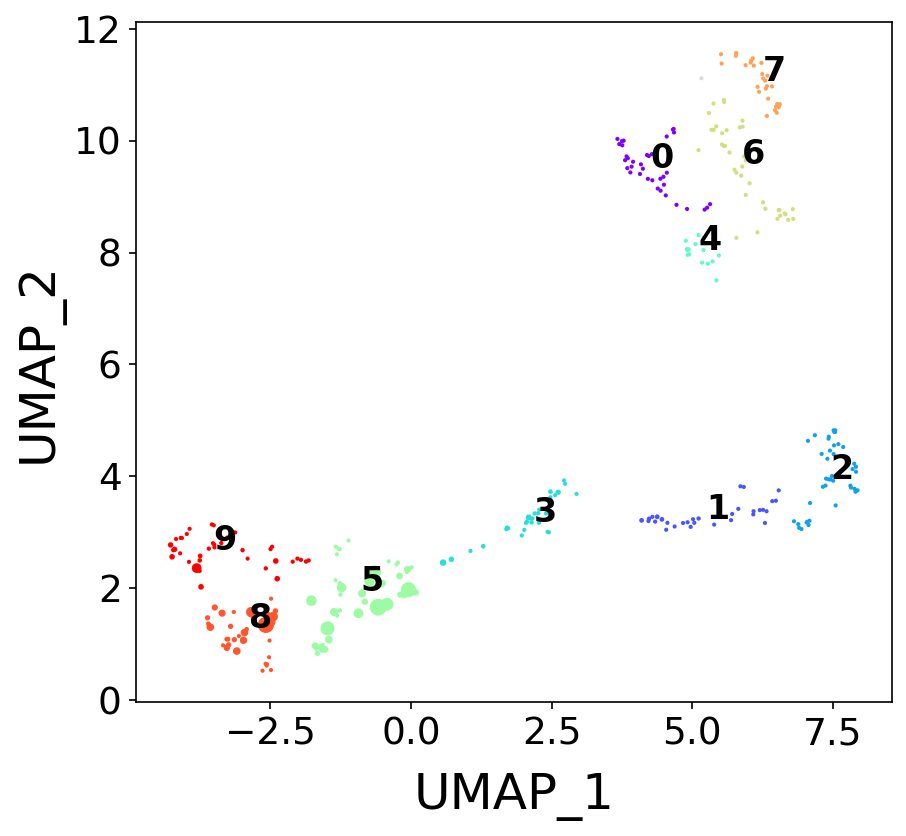

In [30]:
fig, axs = plt.subplots(figsize=(6.5,6), dpi=150)
label_fs=24
tick_fs=18
# Plot clustering in UMAP space for building blocks in position 2
for i in range(np.max(bb2_pactive['Cluster'])+1):
    sub = bb2_pactive[bb2_pactive['Cluster'] == i]
    xtext, ytext = np.median(sub['X']), np.median(sub['Y'])
    txt = axs.text(xtext, ytext, str(i), fontsize=16, fontweight='bold')

axs.scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], s=bb2_size, color=bb2_colors[bb2_pactive['Cluster']])
axs.tick_params(axis="both", labelsize=tick_fs)
axs.set_xlabel('UMAP_1', fontsize=label_fs, labelpad=10)
axs.set_ylabel('UMAP_2', fontsize=label_fs, labelpad=5)
fig.savefig('toc.png')
plt.show()

### Distribution of P(active) values and building blocks in each cluster

In [19]:
bb1_cluster, bb1_data = cluster_rep(bb1_pactive, bb_pos='bb1')
bb2_cluster, bb2_data = cluster_rep(bb2_pactive, bb_pos='bb2')
bb3_cluster, bb3_data = cluster_rep(bb3_pactive, bb_pos='bb3')

In [20]:
bb1_random = gen_random_cluster(bb1_pactive, bb_pos='bb1')
bb2_random = gen_random_cluster(bb2_pactive, bb_pos='bb2')
bb3_random = gen_random_cluster(bb3_pactive, bb_pos='bb3')

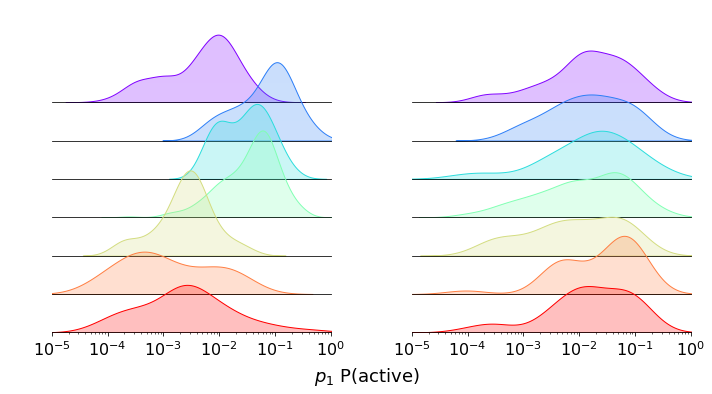

In [21]:
bb_pactive = bb1_pactive
bb_random = bb1_random
# Initialize figure of figures
fig = plt.figure(constrained_layout=True, figsize=(10, 6))
subfigs = fig.subfigures(1, 2, wspace=0, hspace=0.01)
N = np.sum(np.unique(bb_pactive['Cluster']) != -1)

# Plot distribution of P(active) values for each HDBSCAN-generated cluster
axsLeft = subfigs[0].subplots(N, 1, sharex=True)
plt.subplots_adjust(hspace=-0.6)
bb_colors = np.array(set_colors(bb_pactive['Cluster']))
for index, ax in enumerate(axsLeft):
    ax.set_xlim([10**-5, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.patch.set_alpha(0.01)
    ax.spines[['left','right', 'top']].set_visible(False)
    subset = bb_pactive.loc[(bb_pactive['Cluster'] == index) & (bb_pactive['P(active)'] > 0)]
    if index != N-1:
        ax.tick_params(axis='x', which='both', bottom=False)
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
    else:
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
        ax.set_xlabel(xlabel='', fontsize=18, labelpad=10)
        ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1])
        ax.set_xticklabels(labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'], fontsize=16)

# Plot distribution of P(active) values for each randomly-generated cluster
axsRight = subfigs[1].subplots(N, 1, sharex=True)
for index, ax in enumerate(axsRight):
    ax.set_xlim([10**-5, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.minorticks_off()
    ax.patch.set_alpha(0.01)
    ax.spines[['left','right', 'top']].set_visible(False)
    subset = bb_random.loc[(bb_random['Cluster'] == index) & (bb_random['P(active)'] > 0)]
    if index != N-1:
        ax.tick_params(axis='x', which='both', bottom=False)
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
    else:
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
        ax.set_xlabel(xlabel='', fontsize=18, labelpad=10)
        ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1])
        ax.set_xticklabels(labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'], fontsize=16)

plt.suptitle('$p_{1}$ P(active)', y=0.05, fontsize=18)
fig.savefig('figure_8A.png')
plt.show()

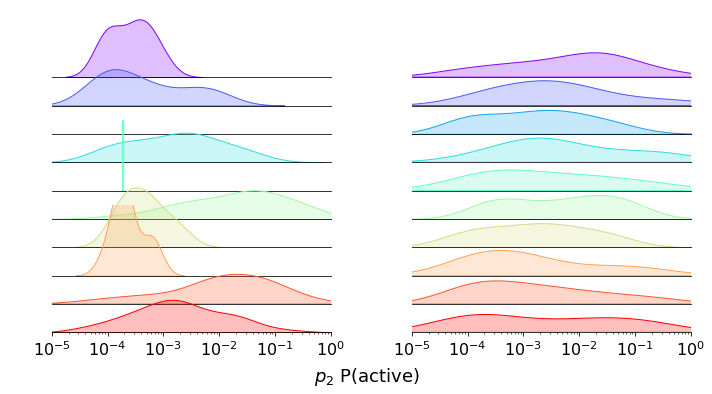

In [22]:
bb_pactive = bb2_pactive
bb_random = bb2_random
# Initialize figure of figures
fig = plt.figure(constrained_layout=True, figsize=(10, 6))
subfigs = fig.subfigures(1, 2, wspace=0, hspace=0.01)
N = np.sum(np.unique(bb_pactive['Cluster']) != -1)

# Plot distribution of P(active) values for each HDBSCAN-generated cluster
axsLeft = subfigs[0].subplots(N, 1, sharex=True)
plt.subplots_adjust(hspace=-0.6)
bb_colors = np.array(set_colors(bb_pactive['Cluster']))
for index, ax in enumerate(axsLeft):
    ax.set_xlim([10**-5, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.patch.set_alpha(0.01)
    ax.spines[['left','right', 'top']].set_visible(False)
    subset = bb_pactive.loc[(bb_pactive['Cluster'] == index) & (bb_pactive['P(active)'] > 0)]
    if index != N-1:
        ax.tick_params(axis='x', which='both', bottom=False)
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
    else:
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
        ax.set_xlabel(xlabel='', fontsize=18, labelpad=10)
        ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1])
        ax.set_xticklabels(labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'], fontsize=16)

# Plot distribution of P(active) values for each randomly-generated cluster
axsRight = subfigs[1].subplots(N, 1, sharex=True)
for index, ax in enumerate(axsRight):
    ax.set_xlim([10**-5, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.minorticks_off()
    ax.patch.set_alpha(0.01)
    ax.spines[['left','right', 'top']].set_visible(False)
    subset = bb_random.loc[(bb_random['Cluster'] == index) & (bb_random['P(active)'] > 0)]
    if index != N-1:
        ax.tick_params(axis='x', which='both', bottom=False)
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
    else:
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
        ax.set_xlabel(xlabel='', fontsize=18, labelpad=10)
        ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1])
        ax.set_xticklabels(labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'], fontsize=16)

plt.suptitle('$p_{2}$ P(active)', y=0.05, fontsize=18)
fig.savefig('figure_8B.png')
plt.show()

KeyboardInterrupt: 

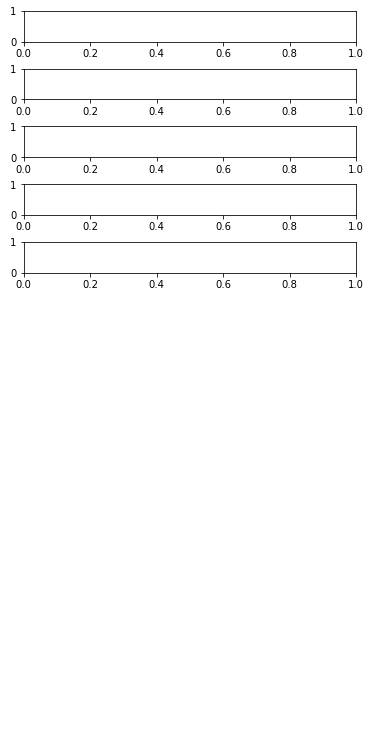

In [23]:
bb_pactive = bb3_pactive
bb_random = bb3_random
# Initialize figure of figures
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
subfigs = fig.subfigures(1, 2, wspace=0, hspace=0.01)
N = np.sum(np.unique(bb_pactive['Cluster']) != -1)

# Plot distribution of P(active) values for each HDBSCAN-generated cluster
axsLeft = subfigs[0].subplots(N, 1, sharex=True)
plt.subplots_adjust(hspace=-0.6)
bb_colors = np.array(set_colors(bb_pactive['Cluster']))
for index, ax in enumerate(axsLeft):
    ax.set_xlim([10**-5, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.patch.set_alpha(0.01)
    ax.spines[['left','right', 'top']].set_visible(False)
    subset = bb_pactive.loc[(bb_pactive['Cluster'] == index) & (bb_pactive['P(active)'] > 0)]
    if index != N-1:
        ax.tick_params(axis='x', which='both', bottom=False)
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
    else:
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
        ax.set_xlabel(xlabel='', fontsize=18, labelpad=10)
        ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1])
        ax.set_xticklabels(labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'], fontsize=16)

# Plot distribution of P(active) values for each randomly-generated cluster
axsRight = subfigs[1].subplots(N, 1, sharex=True)
for index, ax in enumerate(axsRight):
    ax.set_xlim([10**-5, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.minorticks_off()
    ax.patch.set_alpha(0.01)
    ax.spines[['left','right', 'top']].set_visible(False)
    subset = bb_random.loc[(bb_random['Cluster'] == index) & (bb_random['P(active)'] > 0)]
    if index != N-1:
        ax.tick_params(axis='x', which='both', bottom=False)
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
    else:
        sns.kdeplot(subset['P(active)'], ax=ax, color=bb_colors[index], fill=True, log_scale=True)
        ax.set_xlabel(xlabel='', fontsize=18, labelpad=10)
        ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1])
        ax.set_xticklabels(labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'], fontsize=16)
    
plt.suptitle('$p_{3}$ P(active)', y=0.05, fontsize=18)
fig.savefig('figure_8C.png')
plt.show()